In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv("DatasetBarang.csv")
x = dataset.iloc[:, [2,3]].values
y = dataset.iloc[:, -1].values

In [3]:
print(x)

[[  12000      30]
 [  20000      70]
 [1500000      75]
 [2400000      82]
 [2730000      35]
 [3120000      67]
 [1000000      93]
 [ 845000     100]
 [ 600000      44]
 [  55000      67]
 [ 620000      84]
 [ 470000      36]
 [ 390000      82]]


In [4]:
print(y)

[0 1 1 1 0 0 1 0 1 1 0 0 1]


In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=0)

In [6]:
print(x_train)

[[ 845000     100]
 [  55000      67]
 [2400000      82]
 [  12000      30]
 [3120000      67]
 [ 390000      82]]


In [7]:
print(x_test)

[[1000000      93]
 [ 470000      36]
 [2730000      35]
 [ 620000      84]
 [1500000      75]
 [ 600000      44]
 [  20000      70]]


In [8]:
print(y_train)

[0 1 1 0 0 1]


In [9]:
print(y_test)

[1 0 0 0 1 1 1]


In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [11]:
print(x_train)

[[-0.24379823  1.32811603]
 [-0.90338935 -0.20076173]
 [ 1.05451086  0.49418271]
 [-0.93929114 -1.914958  ]
 [ 1.65565719 -0.20076173]
 [-0.62368932  0.49418271]]


In [12]:
print(x_test)

[[-0.11438479  1.00380863]
 [-0.55689528 -1.63698023]
 [ 1.33003626 -1.68330986]
 [-0.43165646  0.58684197]
 [ 0.30307794  0.16987531]
 [-0.44835497 -1.2663432 ]
 [-0.93261174 -0.06177284]]


In [13]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [14]:
y_predict = classifier.predict(x_test)

In [15]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict)
print(cm)

[[2 1]
 [2 2]]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


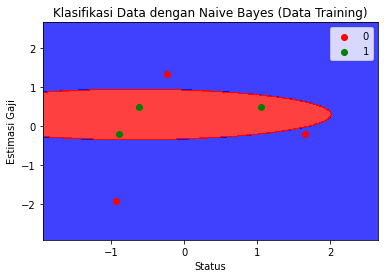

In [16]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min()-1, stop = x_set[:, 0].max() + 1, step=0.01), 
                     np.arange(start = x_set[:, 1].min()-1, stop = x_set[:, 0].max() + 1, step=0.01))
plt.contourf(x1,x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape), 
             alpha=0.75, cmap = ListedColormap(('blue','red')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate (np.unique(y_set)):
  plt.scatter(x_set[y_set == j, 0], x_set[y_set==j, 1],
              c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Klasifikasi Data dengan Naive Bayes (Data Training)')
plt.xlabel('Status')
plt.ylabel('Estimasi Gaji')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


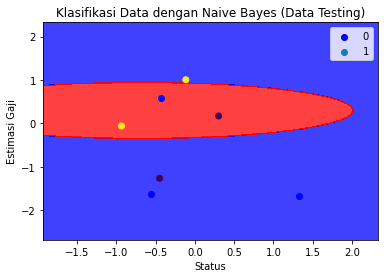

In [17]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_test, y_test
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min()-1, stop = x_set[:, 0].max() + 1, step=0.01), 
                     np.arange(start = x_set[:, 1].min()-1, stop = x_set[:, 0].max() + 1, step=0.01))
plt.contourf(x1,x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape), 
             alpha=0.75, cmap = ListedColormap(('blue','red')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate (np.unique(y_set)):
  plt.scatter(x_set[y_set == j, 0], x_set[y_set==j, 1],
              c = ListedColormap(('blue', 'red'))(i), label = j)
plt.title('Klasifikasi Data dengan Naive Bayes (Data Testing)')
plt.xlabel('Status')
plt.ylabel('Estimasi Gaji')
plt.legend()
plt.show()